In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time

from PIL import Image
from IPython.display import display

import tensorflow as tf
from tensorflow.keras import layers, models

from build_model_ed import build_model_1, build_model_2, build_model_3
from get_frames import get_frames
from get_encoder_decoder import get_encoder_decoder
from get_errors import get_errors

In [4]:
#gpu check
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
#load data
test_size = 0.1
stride_step = 50
norm_factor=1
dtype = 'uint8'

filename = f'save_data/e_d_train_all_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
filename = f'save_data/e_d_train_Puck_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
filename = f'save_data/e_d_test_Puck_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
filename = f'save_data/e_d_test_all_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
#load data
with open(filename, 'rb') as f:
    test_list,frames_data_test = pickle.load(f)
    
print(f'Training dataset shape: {frames_data_test.shape}')
print(f'Training dataset dtype: {frames_data_test.dtype}')

Training dataset shape: (7200, 2048, 50, 3)
Training dataset dtype: uint8


In [6]:
test_list

['Fold21.png',
 'Pucker3.png',
 'Fold3.png',
 'Pucker23.png',
 'Pucker16.png',
 'Twist31.png',
 'Pucker7.png',
 'Pucker26.png',
 'Pucker24.png']

In [15]:
stride_step = 160
model_names_list = [
    'model_ed_2_ps_2_bn_True_du_5',
    'model_ed_2_ps_2_bn_True_du_10', 
    'model_ed_2_ps_2_bn_True_du_20',
    'model_ed_2_ps_2_bn_True_du_30',    
]

ifPrint = False
ifSummary = True

model_dict = {}

for model_name in model_names_list:
    print(f'\nModel name: {model_name}')
    filename = f'saved_models/stride_{stride_step}/ed/{model_name}_settings.pkl'
    
    loss = 'mean_squared_error'
    optimizer = tf.keras.optimizers.legacy.Adadelta(learning_rate=0.1, name="Adadelta")
    #optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01, name="SGD")
    ifSummary=True
    #input_shape = frames_data.shape[1:]
    input_shape = (2048, stride_step, 3)
    #load nn settings
    with open(filename, 'rb') as f:
        dense_units,ifBatchNorm,kernel_size,nn_blocks = pickle.load(f)
    model_weights_path = f'saved_models/stride_{stride_step}/ed/{model_name}/{model_name}'  
    model = build_model_3(input_shape, dense_units, nn_blocks)
    model.compile(loss=loss, optimizer=optimizer, )
    model.load_weights(model_weights_path).expect_partial()
    if ifSummary:
        model.summary()
    model_dict[model_name] = model
    print('\n\n\n')


Model name: model_ed_2_ps_2_bn_True_du_5
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 2048, 160, 3)]    0         
                                                                 
 rescaling_16 (Rescaling)    (None, 2048, 160, 3)      0         
                                                                 
 conv2d_136 (Conv2D)         (None, 2048, 160, 4)      112       
                                                                 
 batch_normalization_128 (B  (None, 2048, 160, 4)      16        
 atchNormalization)                                              
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 1024, 160, 4)      0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv

 up_sampling2d_69 (UpSampli  (None, 512, 160, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_150 (Conv2D)         (None, 512, 160, 8)       1160      
                                                                 
 batch_normalization_142 (B  (None, 512, 160, 8)       32        
 atchNormalization)                                              
                                                                 
 up_sampling2d_70 (UpSampli  (None, 1024, 160, 8)      0         
 ng2D)                                                           
                                                                 
 conv2d_151 (Conv2D)         (None, 1024, 160, 4)      292       
                                                                 
 batch_normalization_143 (B  (None, 1024, 160, 4)      16        
 atchNormalization)                                              
          

 batch_normalization_154 (B  (None, 32, 160, 100)      400       
 atchNormalization)                                              
                                                                 
 up_sampling2d_74 (UpSampli  (None, 64, 160, 100)      0         
 ng2D)                                                           
                                                                 
 conv2d_164 (Conv2D)         (None, 64, 160, 64)       57664     
                                                                 
 batch_normalization_155 (B  (None, 64, 160, 64)       256       
 atchNormalization)                                              
                                                                 
 up_sampling2d_75 (UpSampli  (None, 128, 160, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_165 (Conv2D)         (None, 128, 160, 32)      18464     
          

                                                                 
 flatten_10 (Flatten)        (None, 89600)             0         
                                                                 
 dense_20 (Dense)            (None, 20)                1792020   
                                                                 
 dense_21 (Dense)            (None, 89600)             1881600   
                                                                 
 reshape_10 (Reshape)        (None, 8, 80, 140)        0         
                                                                 
 conv2d_178 (Conv2D)         (None, 8, 80, 140)        176540    
                                                                 
 batch_normalization_168 (B  (None, 8, 80, 140)        560       
 atchNormalization)                                              
                                                                 
 up_sampling2d_80 (UpSampli  (None, 16, 160, 140)      0         
 ng2D)    

                                                                 
 max_pooling2d_92 (MaxPooli  (None, 64, 160, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_192 (Conv2D)         (None, 64, 160, 100)      57700     
                                                                 
 batch_normalization_181 (B  (None, 64, 160, 100)      400       
 atchNormalization)                                              
                                                                 
 max_pooling2d_93 (MaxPooli  (None, 32, 160, 100)      0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 32, 160, 120)      108120    
                                                                 
 batch_normalization_182 (B  (None, 32, 160, 120)      480       
 atchNorma

In [7]:
#run on test set
print(f'Stride step: {stride_step}')
for model_name in model_dict.keys():
    model = model_dict[model_name]
    batch_size = 2
    score = model.evaluate(frames_data_test, frames_data_test, batch_size=batch_size)
    print(f"Model: {model_name}\nTest score: {score}\n")

Stride step: 200
900/900 [==============================] - 11s 9ms/step - loss: 170.9231
Model: model_ed_2_ps_2_bn_True_du_30
Test score: 170.92312622070312



In [8]:
test_list

['Fold21.png',
 'Pucker3.png',
 'Fold3.png',
 'Pucker23.png',
 'Pucker16.png',
 'Twist31.png',
 'Pucker7.png',
 'Pucker26.png',
 'Pucker24.png']

50
Chosen test case: Pucker3.png


Model name: model_ed_2_ps_2_bn_True_du_5

Model name: model_ed_2_ps_2_bn_True_du_10

Model name: model_ed_2_ps_2_bn_True_du_20

Model name: model_ed_2_ps_2_bn_True_du_30


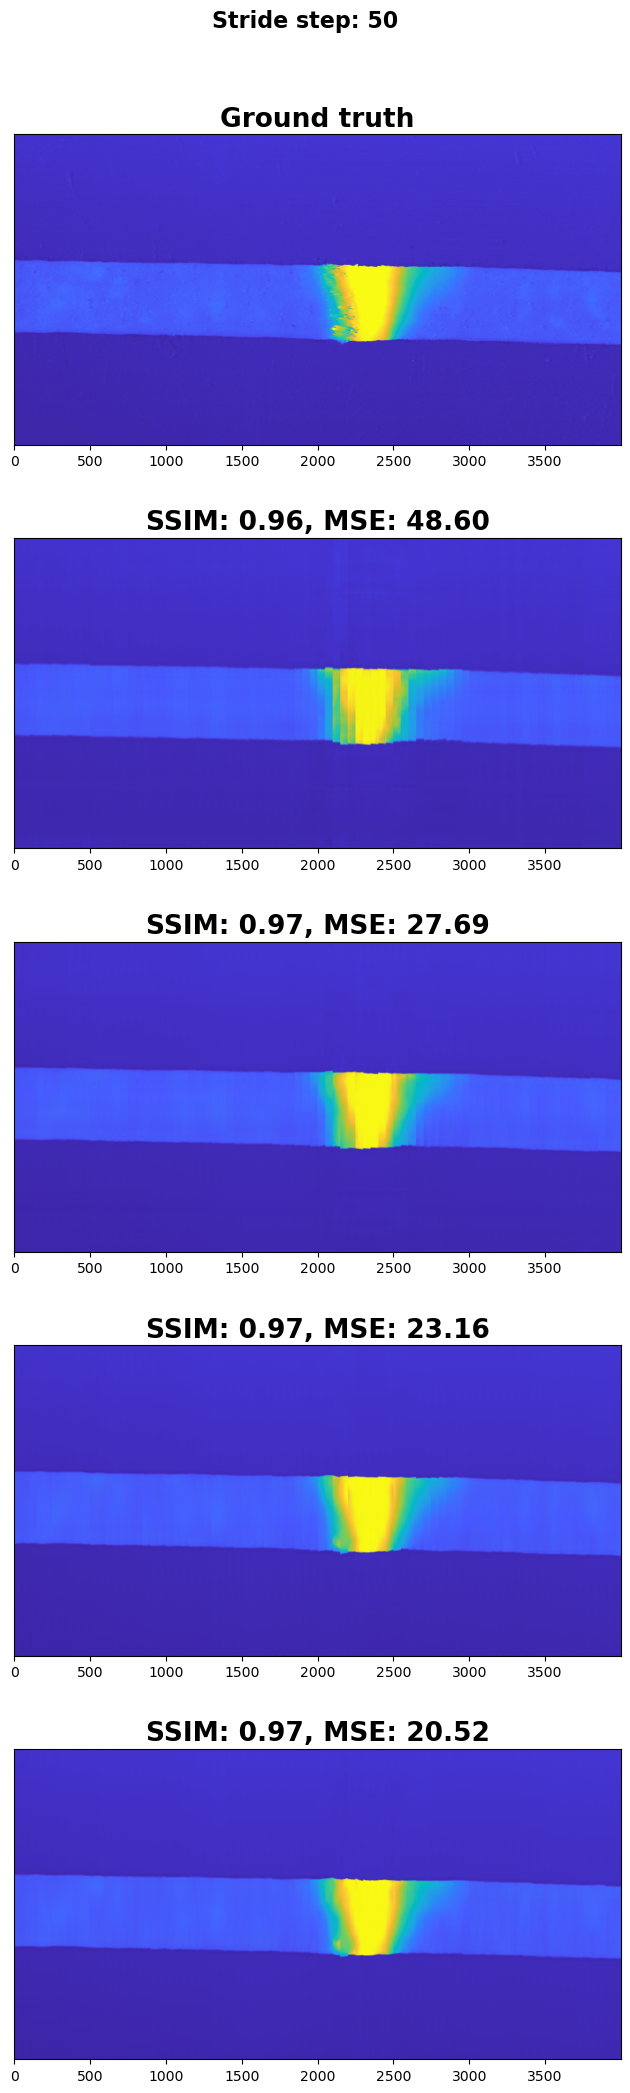

In [7]:
test_case = test_list[1]
print(stride_step)
print(f'Chosen test case: {test_case}\n')


path_list = ['PuckerImages//RGB_cropped',
             'TwistImages//RGB',
             'FoldImages//RGB',]
for path in path_list:
    if test_case[:4]==path[:4]:
        break

img = Image.open(f'{path}//{test_case}')
image_data_gt = np.array(img, dtype=dtype)
#crop the end
image_data_gt = image_data_gt[:,:-96,:]
#get frames
image_data_frames_gt = get_frames(image_data_gt, stride_step, ifPrint = False)

numb_col = len(model_dict.keys())+1    
fig, axes = plt.subplots(numb_col,1, figsize=(10,5*numb_col))
fig.subplots_adjust(hspace=0.3, wspace=0.25)
linewidth = 3.0
fontsize_sec = 14
fig.suptitle(f'Stride step: {stride_step}', fontsize=fontsize_sec+2, fontweight='bold', y=0.93)

ax = axes[0]
ax.imshow(image_data_gt)
ax.set_title(f'Ground truth', fontsize=fontsize_sec+5, fontweight='bold')
ax.set_yticks([])

#prediction
for ii, model_name in enumerate(model_dict.keys()):
    model = model_dict[model_name]
    print(f'\nModel name: {model_name}')

    tic = time.perf_counter()
    for i, frame_data_gt in enumerate(image_data_frames_gt):
        frame_data_predicted = model.predict(np.expand_dims(frame_data_gt, axis=0),verbose = 0)

        if i==0:
            image_data_frames_predicted = frame_data_predicted
        else:
            image_data_frames_predicted = np.append(image_data_frames_predicted, frame_data_predicted, axis=0)
    toc = time.perf_counter()


    #reshape from separate frames into a single image
    tic = time.perf_counter()
    original_shape = image_data_frames_predicted.shape
    #swap axis
    image_data_rsh1 = np.swapaxes(image_data_frames_predicted,1,2)
    #reshape
    image_data_rsh2 = image_data_rsh1.reshape(original_shape[0]*original_shape[2], original_shape[1], original_shape[3])
    #swap axis back
    image_data_predicted = np.swapaxes(image_data_rsh2,0,1)
    #convert float to in
    image_data_predicted=image_data_predicted.astype(int)
    toc = time.perf_counter()
    
    #calc errors
    ssim, mse_gray, mse_rgb = get_errors(image_data_gt, image_data_predicted)
    error_title = f'SSIM: {ssim:.2f}, MSE: {mse_rgb:.2f}'
    
    ax = axes[ii+1]
    ax.imshow(image_data_predicted)
    ls = model_name.split('_')[-1]
    #ax.set_title(f'Prediction. Latent space: {ls}\n{error_title}', fontsize=fontsize_sec+5, fontweight='bold')
    ax.set_title(f'{error_title}', fontsize=fontsize_sec+5, fontweight='bold')
    
    ax.set_yticks([])
save_folder = 'pictures/ed_examples/edit'
filename = f'{save_folder}/{test_case}_{stride_step}.svg'
plt.savefig(filename, bbox_inches='tight')

50
Chosen test case: Fold1.png


Model name: model_ed_2_ps_2_bn_True_du_5

Model name: model_ed_2_ps_2_bn_True_du_10

Model name: model_ed_2_ps_2_bn_True_du_20

Model name: model_ed_2_ps_2_bn_True_du_30


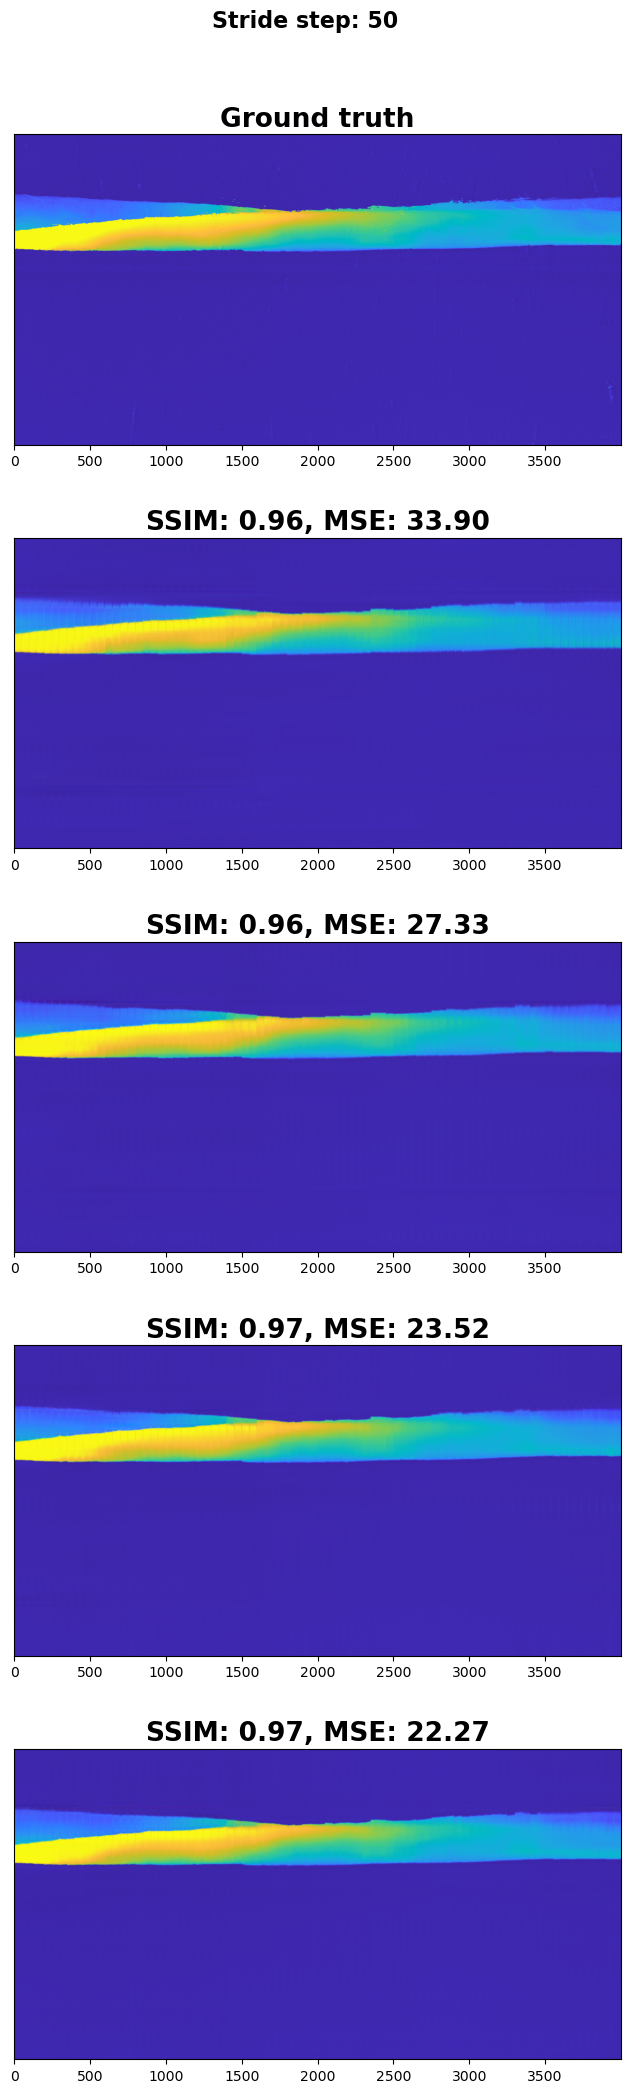

In [8]:
test_case = 'Fold1.png'
print(stride_step)
print(f'Chosen test case: {test_case}\n')


path_list = ['PuckerImages//RGB_cropped',
             'TwistImages//RGB',
             'FoldImages//RGB',]
for path in path_list:
    if test_case[:4]==path[:4]:
        break

img = Image.open(f'{path}//{test_case}')
image_data_gt = np.array(img, dtype=dtype)
#crop the end
image_data_gt = image_data_gt[:,:-96,:]
#get frames
image_data_frames_gt = get_frames(image_data_gt, stride_step, ifPrint = False)

numb_col = len(model_dict.keys())+1    
fig, axes = plt.subplots(numb_col,1, figsize=(10,5*numb_col))
fig.subplots_adjust(hspace=0.3, wspace=0.25)
linewidth = 3.0
fontsize_sec = 14
fig.suptitle(f'Stride step: {stride_step}', fontsize=fontsize_sec+2, fontweight='bold', y=0.93)

ax = axes[0]
ax.imshow(image_data_gt)
ax.set_title(f'Ground truth', fontsize=fontsize_sec+5, fontweight='bold')
ax.set_yticks([])

#prediction
for ii, model_name in enumerate(model_dict.keys()):
    model = model_dict[model_name]
    print(f'\nModel name: {model_name}')

    tic = time.perf_counter()
    for i, frame_data_gt in enumerate(image_data_frames_gt):
        frame_data_predicted = model.predict(np.expand_dims(frame_data_gt, axis=0),verbose = 0)

        if i==0:
            image_data_frames_predicted = frame_data_predicted
        else:
            image_data_frames_predicted = np.append(image_data_frames_predicted, frame_data_predicted, axis=0)
    toc = time.perf_counter()


    #reshape from separate frames into a single image
    tic = time.perf_counter()
    original_shape = image_data_frames_predicted.shape
    #swap axis
    image_data_rsh1 = np.swapaxes(image_data_frames_predicted,1,2)
    #reshape
    image_data_rsh2 = image_data_rsh1.reshape(original_shape[0]*original_shape[2], original_shape[1], original_shape[3])
    #swap axis back
    image_data_predicted = np.swapaxes(image_data_rsh2,0,1)
    #convert float to in
    image_data_predicted=image_data_predicted.astype(int)
    toc = time.perf_counter()
    
    #calc errors
    ssim, mse_gray, mse_rgb = get_errors(image_data_gt, image_data_predicted)
    error_title = f'SSIM: {ssim:.2f}, MSE: {mse_rgb:.2f}'
    
    ax = axes[ii+1]
    ax.imshow(image_data_predicted)
    ls = model_name.split('_')[-1]
    ax.set_title(f'{error_title}', fontsize=fontsize_sec+5, fontweight='bold')
    ax.set_yticks([])
save_folder = 'pictures/ed_examples/edit'
filename = f'{save_folder}/{test_case}_{stride_step}.svg'
plt.savefig(filename, bbox_inches='tight')

In [9]:
test_case = 'Twist5.png'
print(stride_step)
print(f'Chosen test case: {test_case}\n')


path_list = ['PuckerImages//RGB_cropped',
             'TwistImages//RGB',
             'FoldImages//RGB',]
for path in path_list:
    if test_case[:4]==path[:4]:
        break

img = Image.open(f'{path}//{test_case}')
image_data_gt = np.array(img, dtype=dtype)
#crop the end
image_data_gt = image_data_gt[:,:-96,:]
#get frames
image_data_frames_gt = get_frames(image_data_gt, stride_step, ifPrint = False)

numb_col = len(model_dict.keys())+1    
fig, axes = plt.subplots(numb_col,1, figsize=(10,5*numb_col))
fig.subplots_adjust(hspace=0.3, wspace=0.25)
linewidth = 3.0
fontsize_sec = 14
fig.suptitle(f'Stride step: {stride_step}', fontsize=fontsize_sec+2, fontweight='bold', y=0.93)

ax = axes[0]
ax.imshow(image_data_gt)
ax.set_title(f'Ground truth', fontsize=fontsize_sec+5, fontweight='bold')
ax.set_yticks([])

#prediction
for ii, model_name in enumerate(model_dict.keys()):
    model = model_dict[model_name]
    print(f'\nModel name: {model_name}')

    tic = time.perf_counter()
    for i, frame_data_gt in enumerate(image_data_frames_gt):
        frame_data_predicted = model.predict(np.expand_dims(frame_data_gt, axis=0),verbose = 0)

        if i==0:
            image_data_frames_predicted = frame_data_predicted
        else:
            image_data_frames_predicted = np.append(image_data_frames_predicted, frame_data_predicted, axis=0)
    toc = time.perf_counter()


    #reshape from separate frames into a single image
    tic = time.perf_counter()
    original_shape = image_data_frames_predicted.shape
    #swap axis
    image_data_rsh1 = np.swapaxes(image_data_frames_predicted,1,2)
    #reshape
    image_data_rsh2 = image_data_rsh1.reshape(original_shape[0]*original_shape[2], original_shape[1], original_shape[3])
    #swap axis back
    image_data_predicted = np.swapaxes(image_data_rsh2,0,1)
    #convert float to in
    image_data_predicted=image_data_predicted.astype(int)
    toc = time.perf_counter()
    
    #calc errors
    ssim, mse_gray, mse_rgb = get_errors(image_data_gt, image_data_predicted)
    error_title = f'SSIM: {ssim:.2f}, MSE: {mse_rgb:.2f}'
    
    ax = axes[ii+1]
    ax.imshow(image_data_predicted)
    ls = model_name.split('_')[-1]
    ax.set_title(f'{error_title}', fontsize=fontsize_sec+5, fontweight='bold')
    ax.set_yticks([])

save_folder = 'pictures/ed_examples/edit'
filename = f'{save_folder}/{test_case}_{stride_step}.svg'
plt.savefig(filename, bbox_inches='tight')

50
Chosen test case: Twist5.png


Model name: model_ed_2_ps_2_bn_True_du_5

Model name: model_ed_2_ps_2_bn_True_du_10

Model name: model_ed_2_ps_2_bn_True_du_20

Model name: model_ed_2_ps_2_bn_True_du_30


In [11]:
axes[0]

TypeError: 'Axes' object is not subscriptable


Model name: model_ed_2_ps_2_bn_True_du_5

Model name: model_ed_2_ps_2_bn_True_du_10

Model name: model_ed_2_ps_2_bn_True_du_20

Model name: model_ed_2_ps_2_bn_True_du_30

Model name: model_ed_2_ps_2_bn_True_du_5

Model name: model_ed_2_ps_2_bn_True_du_10

Model name: model_ed_2_ps_2_bn_True_du_20

Model name: model_ed_2_ps_2_bn_True_du_30


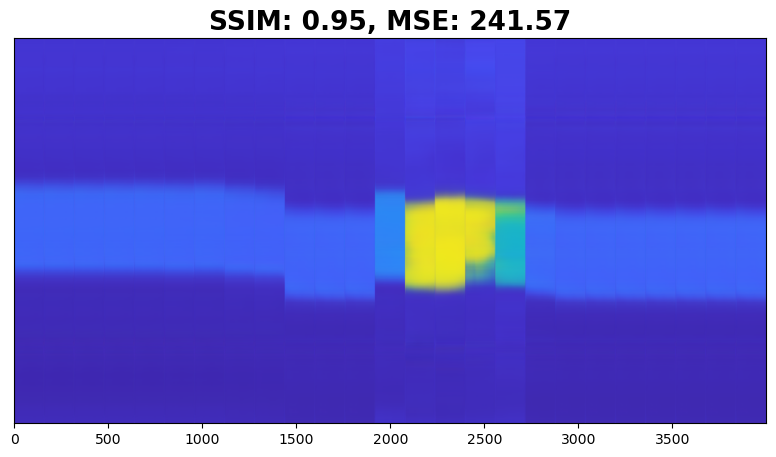

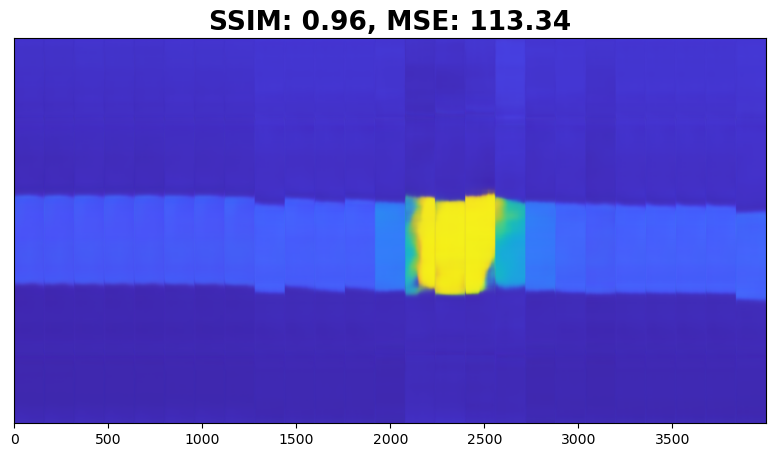

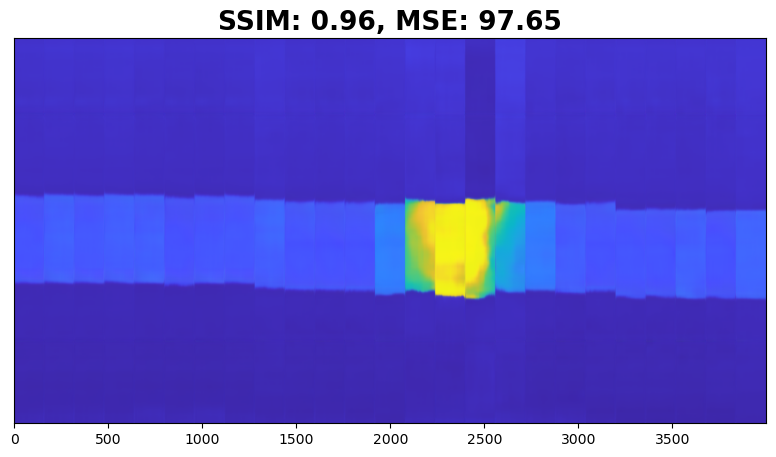

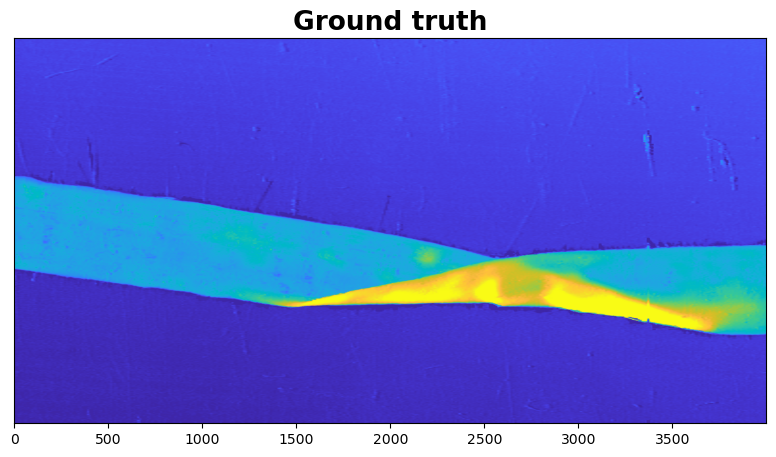

In [16]:
#plot in separate figures
test_case_list = [test_list[1], 'Twist5.png', ]

for test_case in test_case_list:
    
    
    path_list = ['PuckerImages//RGB_cropped',
                 'TwistImages//RGB',
                 'FoldImages//RGB',]
    for path in path_list:
        if test_case[:4]==path[:4]:
            break

    img = Image.open(f'{path}//{test_case}')
    image_data_gt = np.array(img, dtype=dtype)
    #crop the end
    image_data_gt = image_data_gt[:,:-96,:]
    #get frames
    image_data_frames_gt = get_frames(image_data_gt, stride_step, ifPrint = False)


    fig, axes = plt.subplots(1,1, figsize=(10,5))
    linewidth = 3.0
    fontsize_sec = 14

    ax = axes
    ax.imshow(image_data_gt)
    ax.set_title(f'Ground truth', fontsize=fontsize_sec+5, fontweight='bold')
    ax.set_yticks([])
    
    save_folder = 'pictures/ed_examples/edit'
    filename = f'{save_folder}/{test_case}_{stride_step}_gt.svg'
    plt.savefig(filename, bbox_inches='tight')    

    #prediction
    for ii, model_name in enumerate(model_dict.keys()):
        fig, axes = plt.subplots(1,1, figsize=(10,5))
        linewidth = 3.0
        fontsize_sec = 14

        ax = axes
        ax.set_yticks([])
        
        model = model_dict[model_name]
        print(f'\nModel name: {model_name}')

        tic = time.perf_counter()
        for i, frame_data_gt in enumerate(image_data_frames_gt):
            frame_data_predicted = model.predict(np.expand_dims(frame_data_gt, axis=0),verbose = 0)

            if i==0:
                image_data_frames_predicted = frame_data_predicted
            else:
                image_data_frames_predicted = np.append(image_data_frames_predicted, frame_data_predicted, axis=0)
        toc = time.perf_counter()


        #reshape from separate frames into a single image
        tic = time.perf_counter()
        original_shape = image_data_frames_predicted.shape
        #swap axis
        image_data_rsh1 = np.swapaxes(image_data_frames_predicted,1,2)
        #reshape
        image_data_rsh2 = image_data_rsh1.reshape(original_shape[0]*original_shape[2], original_shape[1], original_shape[3])
        #swap axis back
        image_data_predicted = np.swapaxes(image_data_rsh2,0,1)
        #convert float to in
        image_data_predicted=image_data_predicted.astype(int)
        toc = time.perf_counter()

        #calc errors
        ssim, mse_gray, mse_rgb = get_errors(image_data_gt, image_data_predicted)
        error_title = f'SSIM: {ssim:.2f}, MSE: {mse_rgb:.2f}'

        ax.imshow(image_data_predicted)
        ls = model_name.split('_')[-1]
        ax.set_title(f'{error_title}', fontsize=fontsize_sec+5, fontweight='bold')


        save_folder = 'pictures/ed_examples/edit'
        filename = f'{save_folder}/{test_case}_{stride_step}_{ls}.svg'
        plt.savefig(filename, bbox_inches='tight')    